# <center> Ансамбли моделей
**Задание 1.2**  
Задана функция $x^2 + xy - 4y$.

Найдите для неё значение градиента в точке $(1;2)$. В качестве ответа введите длину градиента.

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import plotly.express as px
import plotly.io as pio

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import f1_score, mean_absolute_error, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

pio.renderers.default = 'png'
pio.templates.default = 'plotly_dark'

In [2]:
x, y = sp.symbols('x y', real=True)
f = x**2 + x*y - 4*y
point = {'x': 1, 'y': 2}
grad = sp.Matrix([f.diff(x), f.diff(y)])
grad_point = grad.subs(x, point['x']).subs(y, point['y'])
grad_length = np.linalg.norm(sp.matrix2numpy(grad_point, dtype=float))
print('Функция')
display(f)
print('Градиент')
display(grad)
print('Градиент в точке (1; 2)')
display(grad_point)
print(f'Длина градиента в точке (1; 2): {grad_length}')

Функция


x**2 + x*y - 4*y

Градиент


Matrix([
[2*x + y],
[  x - 4]])

Градиент в точке (1; 2)


Matrix([
[ 4],
[-3]])

Длина градиента в точке (1; 2): 5.0


**Задание 1.6**  
Найдите математическое ожидание для дискретной случайной величины, распределение которой задано следующим образом:

|X|1|2|3|4|
|-|-|-|-|-|
|P|0.2|0.1|0.6|0.1|


In [3]:
round((1*0.2) + (2*0.1) + (3*0.6) + (4*0.1), 1)

2.6

**Задание 1.7**  
Найдите минимум функции $ x^2 + xy - y + y^3 $.


In [4]:
f = x**2 + x*y - y + y**3
diffs = f.diff(x), f.diff(y)
solve = sp.solve(diffs, [x, y])
print('Точки экстремума:', solve)
print('f(-1/3; 2/3) =', f.subs(x, solve[0][0]).subs(y, solve[0][1]))
print('f(1/4; -1/2) =', f.subs(x, solve[1][0]).subs(y, solve[1][1]))

Точки экстремума: [(-1/3, 2/3), (1/4, -1/2)]
f(-1/3; 2/3) = -13/27
f(1/4; -1/2) = 5/16


Точка минимума: $ (-\frac{1}{3}; \frac{2}{3}) $

***
**Задание 2.7**  
* Подготовьте данные к классификации. Условно разделите вино на хорошее и плохое. Хорошим вином будем называть то, параметр `quality` которого — `6` и более.
* Сравните несколько методов классификации: логистическую регрессию, дерево решений и бэггинг. Это позволит вам увидеть, как меняется качество в зависимости от выбора того или иного алгоритма.
* Разделите выборку на обучающую и тестовую в соотношении `70/30`, в качестве значения параметра `random_state` возьмите число `42`.
* Для начала обучите два классификатора: логистическую регрессию (с параметрами по умолчанию) и дерево решений (`random_state = 42`, максимальная глубина — `10`).

In [5]:
data = pd.read_csv('data/wineQualityReds.zip', index_col=0)
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data['quality'] = data['quality'].apply(lambda quality: int(quality >= 6))
data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [7]:
X, y = data.drop(columns='quality'), data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

logreg_model = LogisticRegression().fit(X_train, y_train)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10).fit(X_train, y_train)

print(
    'LogisticRegression F1-score:', f1_score(y_test, logreg_model.predict(X_test)).round(3),
    '\nDecisionTreeClassifier F1-score:', f1_score(y_test, dt_model.predict(X_test)).round(3)
)

LogisticRegression F1-score: 0.753 
DecisionTreeClassifier F1-score: 0.793


C:\Users\sadeyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [8]:
bagging_model = BaggingClassifier(
    estimator=dt_model,
    n_estimators=1500,
    n_jobs=-1,
    random_state=42
).fit(X_train, y_train)

print('BaggingClassifier F1-score:', f1_score(y_test, bagging_model.predict(X_test)).round(3))

BaggingClassifier F1-score: 0.818


***
# <center>Случайный лес. Практика
**Задание 3.4**  

In [9]:
data = pd.read_csv('data/boston__1_.zip')
data.head()

,crim_rate,zn,business,river,nit_oxiden,rooms,age,dist,highways_index,tax,pup_per_teaс,lower,target
0,"0,00632",18,"2,31",0,"0,538","6,575","65,2","4,09",1,296,"15,3","4,98",24
1,"0,02731",0,"7,07",0,"0,469","6,421","78,9","4,9671",2,242,"17,8","9,14","21,6"
2,"0,02729",0,"7,07",0,"0,469","7,185","61,1","4,9671",2,242,"17,8","4,03","34,7"
3,"0,03237",0,"2,18",0,"0,458","6,998","45,8","6,0622",3,222,"18,7","2,94","33,4"
4,"0,06905",0,"2,18",0,"0,458","7,147","54,2","6,0622",3,222,"18,7","5,33","36,2"


In [10]:
data = data.applymap(lambda x: float(str(x).replace(',', '.')))

In [11]:
X, y = data.drop(columns='target'), data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.3)

round(y_train.mean(), 2)

22.77

In [12]:
lr_model = LinearRegression().fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print('LinearRegression MAE:', mean_absolute_error(y_test, y_pred).round(2))

LinearRegression MAE: 3.72


In [13]:
dt_model = DecisionTreeRegressor(random_state=13).fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print('DecisionTreeRegressor MAE:', mean_absolute_error(y_test, y_pred).round(2))

DecisionTreeRegressor MAE: 2.84


In [14]:
tree_estimators = [3, 10, 100, 500]
result = []

for n_estimators in tree_estimators:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=13, n_jobs=-1).fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    result.append(mean_absolute_error(y_test, y_pred))
    
best_index = np.argmin(result)
min_res = round(min(result), 2)
print(f'RandomForestRegressor(n_estimators={tree_estimators[best_index]}) MAE: {min_res}')

RandomForestRegressor(n_estimators=500) MAE: 2.24


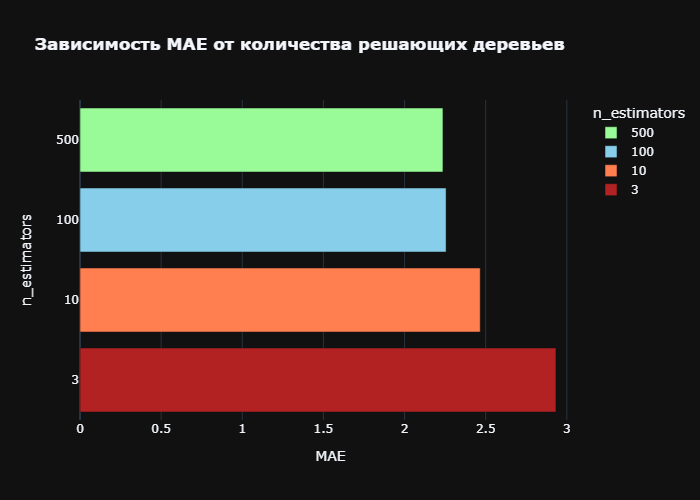

In [15]:
plot_df = pd.DataFrame({
    'n_estimators': tree_estimators,
    'MAE': result
}).sort_values(by='MAE')
plot_df['n_estimators'] = plot_df['n_estimators'].astype(str)
px.bar(
    data_frame=plot_df,
    x='MAE',
    y='n_estimators',
    height=500,
    width=700,
    title='<b>Зависимость MAE от количества решающих деревьев<b>',
    color='n_estimators',
    color_discrete_sequence=['PaleGreen', 'SkyBlue', 'Coral', 'FireBrick']
).show()

***
* Date — дата, в которую зафиксировано наблюдение;
* Location — местонахождение метеорологической станции;
* MinTemp — минимальная температура (℃);
* MaxTemp — максимальная температура (℃);
* Rainfall — количество осадков (дождь) за сутки (мм);
* Evaporation — количество испарений до 9 утра (мм);
* Sunshine — количество часов в сутках, когда светило солнце;
* WindGustDir — направление самого сильного порыва ветра за последние 24 часа;
* WindGustSpeed — скорость самого сильного порыва ветра за последние 24 часа;
* WindDir9am — направление ветра в 9 утра;
* WindDir3pm — направление ветра в 3 часа дня;
* WindSpeed9am — скорость ветра в 9 часов утра;
* WindSpeed3pm — скорость ветра в 3 часа дня;
* Humidity9am — влажность в 9 утра;
* Humidity3pm — влажность в 3 часа дня;
* Pressure9am — атмосферное давление в 9 утра;
* Pressure3pm — атмосферное давление в 3 часа дня;
* Cloud9am — часть неба, закрытая облаками, в 9 утра;
* Cloud3pm — часть неба, закрытая облаками, в 3 часа дня;
* Temp9am — температура в 9 утра;
* Temp3pm — температура в 3 часа дня;
* RainToday — наличие дождя в этот день;
* RainTomorrow — наличие дождя на следующий день.

Целевой переменной является столбец `RainTomorrow`.



In [16]:
data = pd.read_csv('data/weatherAUS.zip')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [17]:
print('Количество пропусков в данных:', data.isna().sum().sum())

Количество пропусков в данных: 343248


In [18]:
na_features = (data.isna().sum() / data.shape[0]).sort_values(ascending=False)
na_features = na_features[na_features > 0.4].index.tolist()
print('Признаки, в которых более 40% пропусков:', na_features)
data.drop(columns=na_features, inplace=True)

Признаки, в которых более 40% пропусков: ['Sunshine', 'Evaporation', 'Cloud3pm']


In [19]:
# Заменим Yes на 1, а No на 0. Пропуски не трогаем
rain_encode = lambda rain: int(rain == 'Yes') if rain in ['Yes', 'No'] else rain
data['RainToday'] = data['RainToday'].apply(rain_encode)
data['RainTomorrow'] = data['RainTomorrow'].apply(rain_encode)

In [20]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Month'] = data['Date'].dt.month.astype(str)
data.drop(columns='Date', inplace=True)

In [21]:
print(
    'Месяц, который имеет самую большую часть дождливых дней относительно всех дней месяца:',
    data.groupby(by='Month')['RainToday'].mean().sort_values(ascending=False).index[0]
)

Месяц, который имеет самую большую часть дождливых дней относительно всех дней месяца: 7


In [22]:
# Сделаем dummy-столбцы и удалим все строки с пропусками
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
data = pd.concat([data.drop(columns=categoricals), pd.get_dummies(data[categoricals])], axis=1)
data.dropna(how='any', axis=0, inplace=True)

In [23]:
X, y = data.drop(columns='RainTomorrow'), data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31, test_size=0.3)

In [24]:
def bootstrap(X:pd.Series, n_samples=1000):
    np.random.seed(31)
    mean_samples = np.array([])
    for sample in range(n_samples):
        rnd_sample = np.random.randint(0, X.shape[0], size=X.shape[0])
        mean_samples = np.append(mean_samples, X.iloc[rnd_sample].mean())
    std = round(mean_samples.std(), 2)
    print(f'Стандартное отклонение для {n_samples} бутстреп выборок признака {X.name}: {std}')

bootstrap(X_train['MinTemp'])
    

Стандартное отклонение для 1000 бутстреп выборок признака MinTemp: 0.03


In [25]:
logreg_model = LogisticRegression().fit(X_train, y_train)
print('ROC-AUC на LogisticRegression:', round(roc_auc_score(y_test, logreg_model.predict(X_test)), 2))

ROC-AUC на LogisticRegression: 0.73


C:\Users\sadeyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [26]:
params = {
    'max_leaf_nodes': list(range(2, 10)), 
    'min_samples_split': [2, 3, 4],
    'max_depth': [5,7,9,11]
}
best_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
).fit(X_train, y_train)

y_pred = best_dt.best_estimator_.predict(X_test)
print(
    'ROC-AUC на оптимальном дереве решений:', round(roc_auc_score(y_test, y_pred), 2),
    '\nBest params:', best_dt.best_estimator_.get_params()
)

ROC-AUC на оптимальном дереве решений: 0.7 
Best params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=31, n_jobs=-1).fit(X_train, y_train)
print('ROC-AUC на RandomForestClassifier:', round(roc_auc_score(y_test, rf_model.predict(X_test)), 2))

ROC-AUC на RandomForestClassifier: 0.74


In [28]:
params = {
    'max_features': [ 4, 5, 6, 7],
    'min_samples_leaf': [3, 5, 7, 9, 11],
    'max_depth': [5, 10, 15]
}
best_rf = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators=100, random_state=31, n_jobs=-1),
    param_grid=params,
    cv=3,
    n_jobs=-1,
    scoring='roc_auc'
).fit(X_train, y_train)

y_pred = best_rf.best_estimator_.predict(X_test)
print('ROC-AUC на оптимальном RandomForestClassifier:', round(roc_auc_score(y_test, y_pred), 2))

ROC-AUC на оптимальном RandomForestClassifier: 0.7


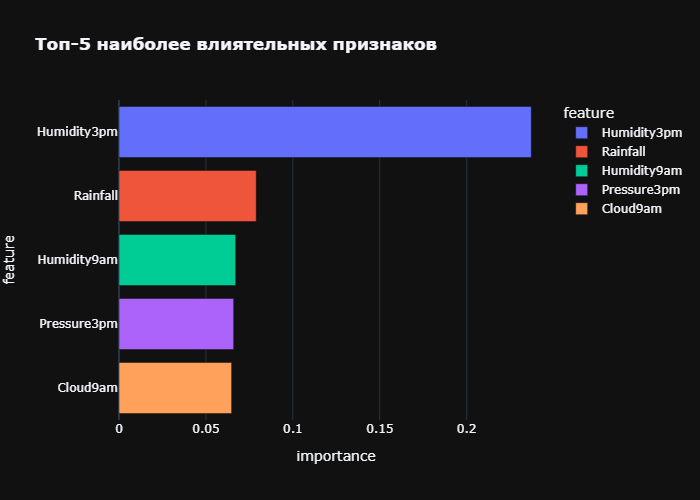

In [29]:
feature_importances = pd.DataFrame({
    'feature': best_rf.best_estimator_.feature_names_in_,
    'importance': best_rf.best_estimator_.feature_importances_
}).sort_values(by='importance', ascending=False).head(5)
px.bar(
    feature_importances,
    x='importance',
    y='feature',
    color='feature',
    width=700,
    height=500,
    title='<b>Топ-5 наиболее влиятельных признаков<b>'
).show()

# <center>Бустинг. Практика

Нашей задачей будет **предсказать удовлетворённость пассажиров**.

* Gender — пол пассажира (женский, мужской);
* Customer Type — тип клиента (постоянный/непостоянный клиент);
* Age — возраст клиента;
* Type of Travel — цель перелета (личная/деловая поездка);
* Class — туристический класс пассажира (Business, Eco, Eco Plus);
* Flight distance — расстояние полета;
* Inflight wifi service — уровень удовлетворённости Wi-Fi (0 — не применимо, 1–5);
* Departure/Arrival time convenient — уровень удовлетворённости временем отправления и прибытия;
* Ease of Online booking — уровень удовлетворённости онлайн-бронированием;
* Gate location — уровень удовлетворённости расположением выхода на посадку;
* Food and drink — уровень удовлетворённости едой и напитками;
* Online boarding — уровень удовлетворённости онлайн-регистрацией;
* Seat comfort — уровень удовлетворённости комфортом сидений;
* Inflight entertainment — уровень удовлетворённости развлечениями на борту;
* On-board service — уровень удовлетворённости сервисом на борту;
* Leg room service — уровень удовлетворённости местом для ног;
* Baggage handling — уровень удовлетворённости обработкой багажа;
* Check-in service — уровень удовлетворённости услугами регистрации;
* Inflight service — уровень удовлетворённости обслуживанием во время полёта;
* Cleanliness — уровень удовлетворённости чистотой;
* Departure Delay in Minutes — задержка при отправлении (в минутах);
* Arrival Delay in Minutes — задержка при прибытии (в минутах);
* **Satisfaction — удовлетворённость авиакомпанией — целевая переменная (satisfaction/neutral/dissatisfaction).**


In [33]:
data = pd.read_csv('data/AirPass.zip', index_col=0)
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [42]:
print(
    'Количество пропусков:', data.isna().sum().sum(),
    '\nСтолбцы с пропусками:', (data.isna().sum())[data.isna().sum() > 0].index.tolist()
)

Количество пропусков: 310 
Столбцы с пропусками: ['Arrival Delay in Minutes']


Заполним пропуски медианой

In [43]:
data.fillna({'Arrival Delay in Minutes': data['Arrival Delay in Minutes'].median()}, inplace=True)
print('Среднее значение признака с пропусками после того, как их заполнили:', round(data['Arrival Delay in Minutes'].mean(), 2))

Среднее значение признака с пропусками после того, как их заполнили: 15.13


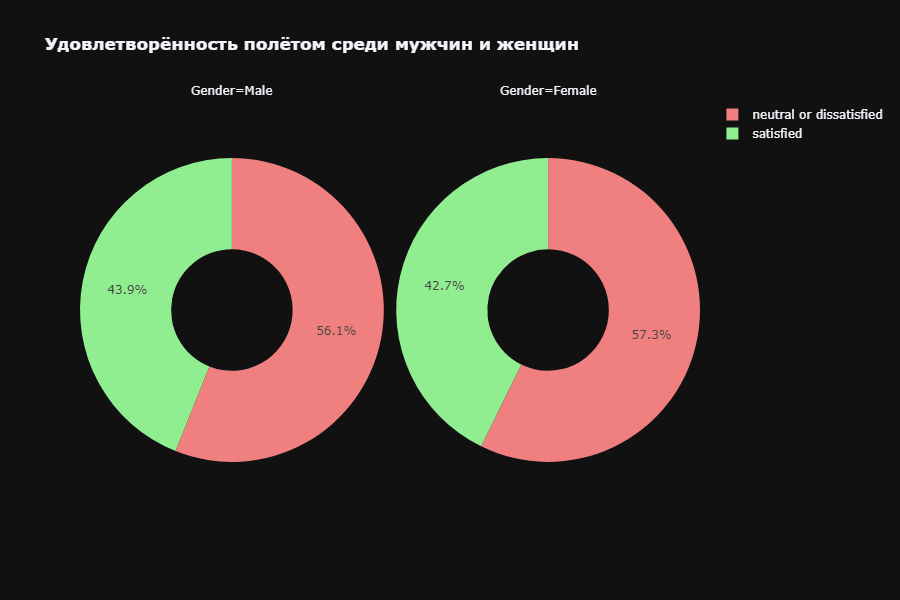

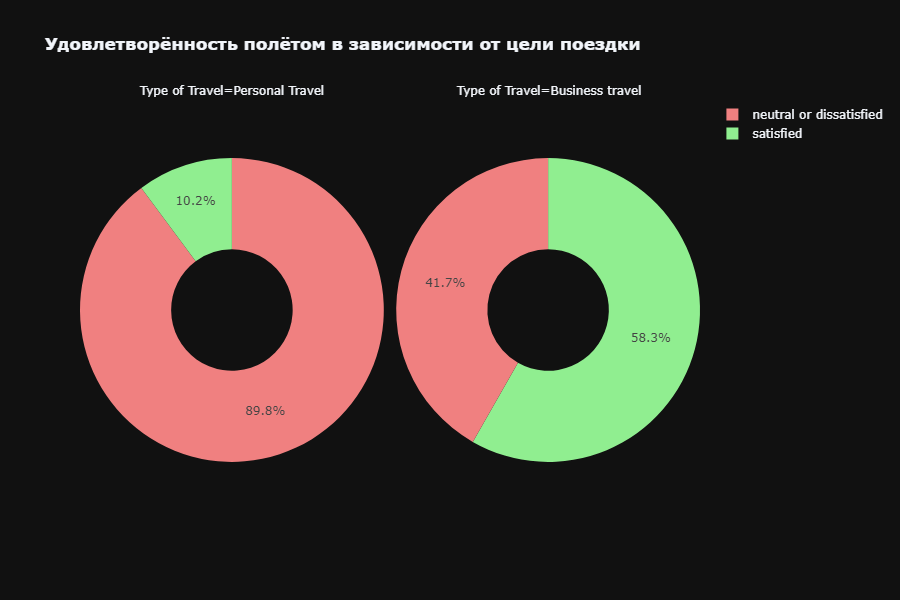

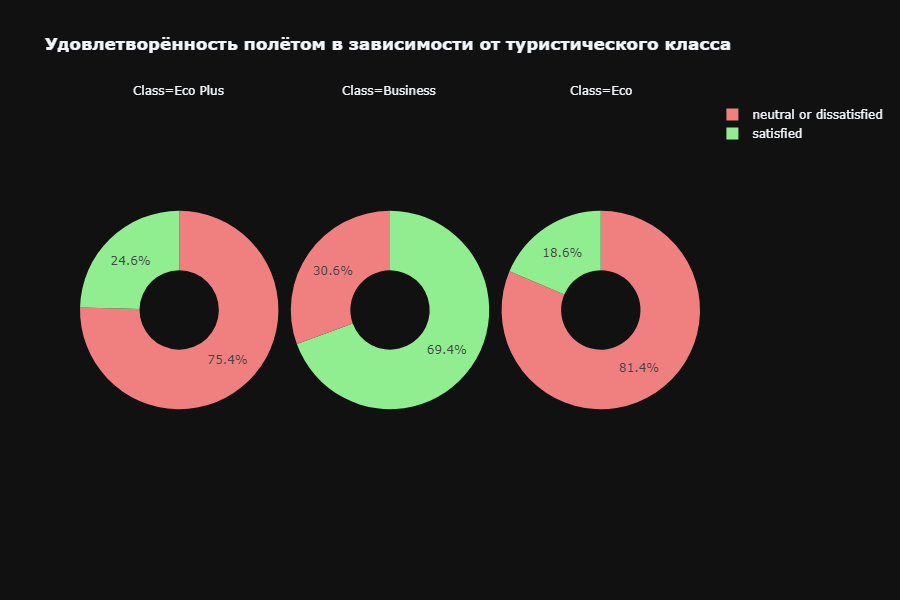

In [53]:
px.pie(
    data_frame=data,
    facet_col='Gender',
    names='satisfaction',
    width=900,
    height=600,
    title='<b>Удовлетворённость полётом среди мужчин и женщин</b>',
    color='satisfaction',
    hole=0.4,
    color_discrete_map={'satisfied': 'LightGreen', 'neutral or dissatisfied': 'LightCoral'}
).show()

px.pie(
    data_frame=data,
    facet_col='Type of Travel',
    names='satisfaction',
    width=900,
    height=600,
    title='<b>Удовлетворённость полётом в зависимости от цели поездки</b>',
    color='satisfaction',
    hole=0.4,
    color_discrete_map={'satisfied': 'LightGreen', 'neutral or dissatisfied': 'LightCoral'}
).show()

px.pie(
    data_frame=data,
    facet_col='Class',
    names='satisfaction',
    width=900,
    height=600,
    title='<b>Удовлетворённость полётом в зависимости от туристического класса</b>',
    color='satisfaction',
    hole=0.4,
    color_discrete_map={'satisfied': 'LightGreen', 'neutral or dissatisfied': 'LightCoral'}
).show()

Перекодируем часть бинарных признаков, чтобы использовать их при обучении:



In [54]:
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
data['Customer Type'] = data['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
data['Type of Travel'] = data['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  int64  
 2   Customer Type                      103904 non-null  int64  
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  int64  
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [60]:
data = pd.get_dummies(data, columns=['Class'])

In [62]:
X, y = data.drop(columns='satisfaction'), data['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26, test_size=0.2)

In [65]:
s_scaler = StandardScaler().fit(X_train)
X_train_scaled = s_scaler.transform(X_train)
X_test_scaled = s_scaler.transform(X_test)

Перейдём к обучению моделей

***LogisticRegression***

In [68]:
logreg_model = LogisticRegression().fit(X_train_scaled, y_train)
y_pred = logreg_model.predict(X_test_scaled)
print('F1-score on LogisticRegression:', round(f1_score(y_test, y_pred), 3))

F1-score on LogisticRegression: 0.855


***AdaBoostClassifier***

In [71]:
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=26), 
    random_state=26,
    learning_rate=0.01
).fit(X_train_scaled, y_train)
y_pred = adaboost_model.predict(X_test_scaled)
print('F1-score on AdaBoostClassifier:', round(f1_score(y_test, y_pred), 3))

F1-score on AdaBoostClassifier: 0.94


***GradientBoostingClassifier***

In [73]:
params = {
    "n_estimators": 2**np.arange(8),
    "learning_rate": 0.1**np.arange(3)
}
gb_best = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=params,
    n_jobs=-1,
    cv=3,
    scoring='f1'
).fit(X_train_scaled, y_train)

print('Best score on GridSearchCV:', round(gb_best.best_score_, 3))

Best score on GridSearchCV: 0.949


***XGBoost***

In [74]:
xgb_model = XGBClassifier(random_state=26).fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)
print('F1-score on XGBClassifier:', round(f1_score(y_test, y_pred), 3))

F1-score on XGBClassifier: 0.958


***CatBoost***

In [76]:
cb_model = CatBoostClassifier(random_state=26, verbose=0).fit(X_train_scaled, y_train)
y_pred = cb_model.predict(X_test_scaled)
print('F1-score on CatBoostClassifier:', round(f1_score(y_test, y_pred), 3))

F1-score on CatBoostClassifier: 0.96


In [86]:
conf_matrix = get_confusion_matrix(cb_model, Pool(X_train_scaled, y_train))
np.round(conf_matrix / X_train_scaled.shape[0] * 100) 

array([[56.,  1.],
       [ 2., 42.]])

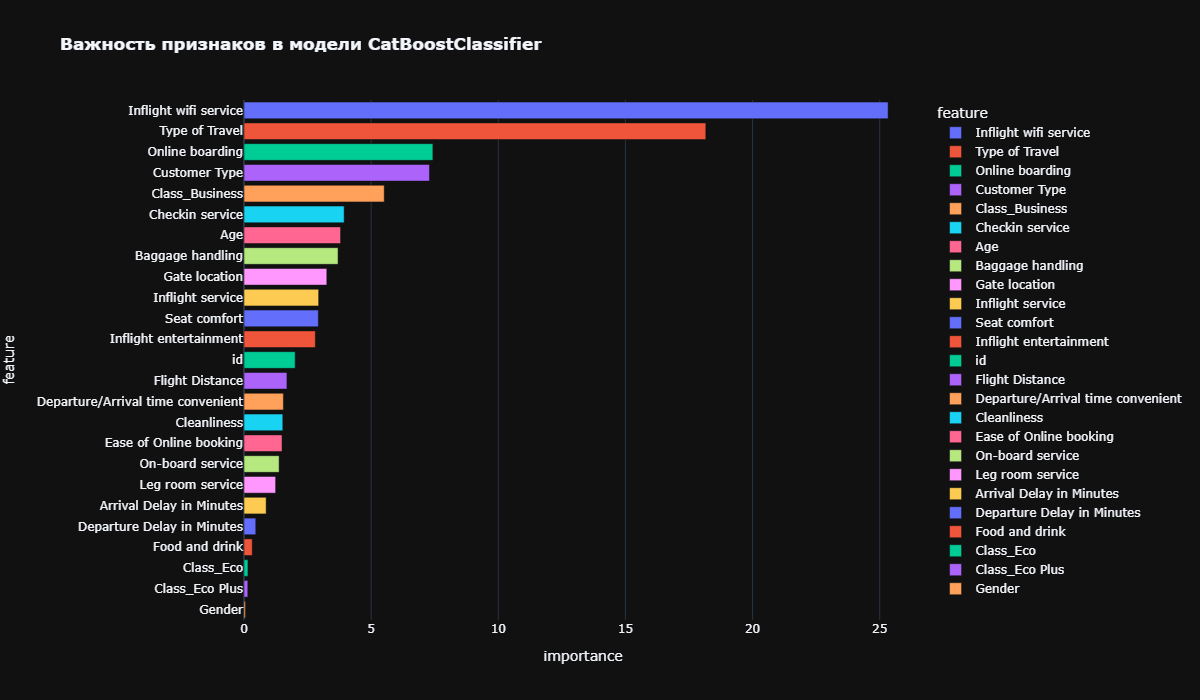

In [90]:
feature_importances = pd.DataFrame({
    'feature': X_train.columns.tolist(),
    'importance': cb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

px.bar(
    data_frame=feature_importances,
    x='importance',
    y='feature',
    color='feature',
    width=1200,
    height=700,
    title='<b>Важность признаков в модели CatBoostClassifier</b>'
).show()

***
Необходимо **классифицировать семейства лягушек** в зависимости от особенностей их кваканья и прочих звуковых эффектов.

Будем решать задачу бинарной классификации по выявлению лягушек, которые относятся к семейству `'Dendrobatidae'` (признак `'Family'`). Семейство `'Dendrobatidae'` будет классом 1, все остальные семейства — классом 0.


In [2]:
data = pd.read_csv('data/Frogs_MFCCs.zip').drop(columns=['Genus', 'Species', 'RecordID'])
data['Family'] = data['Family'].apply(lambda family: int(family == 'Dendrobatidae'))
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,0
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,0
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,0
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,0
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,0


In [3]:
X, y = data.drop(columns='Family'), data['Family']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31, test_size=0.2)

**RandomForestClassifier**

In [4]:
rf_model = RandomForestClassifier(
    n_estimators=10,
    random_state=42,
    n_jobs=-1
).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print('RF F1-score:', f1_score(y_test, y_pred).round(2))

RF F1-score: 0.97


**Stacking**

In [7]:
stacking_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=10, random_state=31)),
        ('knn', KNeighborsClassifier(n_neighbors=11)),
        ('naive_bayes', GaussianNB())
    ],
    final_estimator=LogisticRegression()
).fit(X_train.values, y_train.values)
y_pred = stacking_model.predict(X_test.values)
print('Stacking F1-score:', f1_score(y_test, y_pred).round(2))

Stacking F1-score: 0.99
